In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [55]:
pd.set_option('display.max_columns',None)

In [56]:
df=pd.read_csv('power_plant.csv')
df.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [57]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [58]:
df.shape

(907, 27)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

<AxesSubplot:>

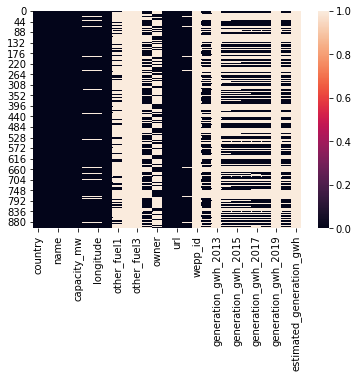

In [60]:
sns.heatmap(df.isnull())

In [61]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can see from above that there are lot of missing values in the data, if we will drop the rows then we will loose lot of data so we need to drop some columns. 

In [62]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are object as well as float data, so we need to covert object to integer data type.

In [63]:
countrywise_plant = df.country_long.value_counts().head(15)
countrywise_plant

India    907
Name: country_long, dtype: int64

In [64]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

As there is only one country in the data, so we can drop country and country_long columns. 
We can also drop 

In [65]:
df.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [70]:
df_new=df.drop(['country','country_long', 'name', 'gppd_idnr','url','geolocation_source','wepp_id'],axis=1)

In [71]:
df=df_new

In [72]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df['total_generation'] = df['generation_gwh_2013'] + df['generation_gwh_2014'] + df['generation_gwh_2015'] + df['generation_gwh_2016'] + df['generation_gwh_2017']+ df['generation_gwh_2018'] + df['generation_gwh_2019']

In [76]:
df.drop(['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],axis=1,inplace=True)

In [77]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,estimated_generation_gwh,total_generation
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN


In [89]:
df.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
year_of_capacity_data       388
generation_data_source      458
estimated_generation_gwh    907
total_generation            907
dtype: int64

We will drop other fuels columns also, as they have many missing values and will not impact on generation.

In [90]:
df.drop(['other_fuel1','other_fuel2','other_fuel3'],axis=1,inplace=True)

In [92]:
df.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
commissioning_year          380
owner                       565
source                        0
year_of_capacity_data       388
generation_data_source      458
estimated_generation_gwh    907
total_generation            907
dtype: int64

We will drop missing values from latitude and longitude column

In [97]:
df.dropna(subset = ['latitude','longitude'],inplace=True)

In [99]:
df.drop(['owner','generation_data_source'],axis=1,inplace=True)

In [100]:
df.isnull().sum()

capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year          365
source                        0
year_of_capacity_data       369
estimated_generation_gwh    861
total_generation            861
dtype: int64

Here we will drop the estimated_generation_gwh and total_generation also, because they have around 861 missing values. So, we dont have data to predict the output.

In [107]:
df.drop(['estimated_generation_gwh','total_generation'],axis=1,inplace=True)

In [78]:
Primary_fuel_count = df.primary_fuel.value_counts()
Primary_fuel_count

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [79]:
Primary_fuel = df.primary_fuel.value_counts() * 100 / df.primary_fuel.count()
Primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

In [80]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Type of fuel used in power plant')

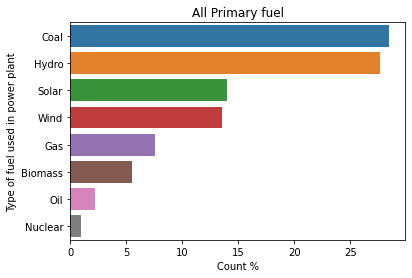

In [81]:
sns.barplot(x = Primary_fuel, y = Primary_fuel.index)
plt.title('All Primary fuel')
plt.xlabel('Count %')
plt.ylabel('Type of fuel used in power plant')

Text(0.5, 1.0, 'power plant capacity and primary fuel')

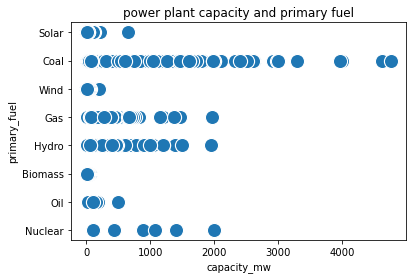

In [82]:
sns.scatterplot(x = df.capacity_mw, y = df.primary_fuel, s = 200)
plt.title('power plant capacity and primary fuel')

In [101]:
All_capacity = df.capacity_mw.sum()
All_capacity

293068.946

In [102]:
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [103]:
fossil_fuel = df.primary_fuel.isin(['Gas', 'Oil', 'Coal', 'Nuclear'])
no_of_fossil_fuel_plant = fossil_fuel.value_counts().head()
no_of_fossil_fuel_plant

False    514
True     347
Name: primary_fuel, dtype: int64

In [104]:
renewable = df.primary_fuel.isin(['Solar', 'Wind', 'Hydro', 'Biomass'])
no_of_renewable_plant = renewable.value_counts().head()
no_of_renewable_plant

True     514
False    347
Name: primary_fuel, dtype: int64

In [108]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data
count,861.000000,861.000000,861.000000,496.000000,492.0
mean,340.382051,21.197918,77.464907,1997.012097,2019.0
std,601.830519,6.239612,4.939316,16.924546,0.0
min,0.000000,8.168900,68.644700,1927.000000,2019.0
25%,18.000000,16.773900,74.256200,1988.000000,2019.0
50%,60.000000,21.780000,76.719500,2001.000000,2019.0
75%,412.020000,25.512400,79.440800,2011.000000,2019.0
max,4760.000000,34.649000,95.408000,2018.000000,2019.0


In [109]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'year_of_capacity_data'],
      dtype='object')

In [112]:
from sklearn.impute import SimpleImputer

In [113]:
imp= SimpleImputer(strategy='most_frequent')
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1, 1))
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,NaN


In [114]:
imp= SimpleImputer(strategy='most_frequent')
df['year_of_capacity_data']=imp.fit_transform(df['year_of_capacity_data'].values.reshape(-1, 1))
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,2019.0
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,2019.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 906
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            861 non-null    float64
 1   latitude               861 non-null    float64
 2   longitude              861 non-null    float64
 3   primary_fuel           861 non-null    object 
 4   commissioning_year     861 non-null    float64
 5   source                 861 non-null    object 
 6   year_of_capacity_data  861 non-null    float64
dtypes: float64(5), object(2)
memory usage: 53.8+ KB


In [116]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['primary_fuel', 'source']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data
0,2.5,28.1839,73.2407,6,2011.0,109,2019.0
1,98.0,24.7663,74.6090,1,2015.0,174,2019.0
2,39.2,21.9038,69.3732,7,2015.0,21,2019.0
3,135.0,23.8712,91.3602,2,2004.0,22,2019.0
4,1800.0,21.9603,82.4091,1,2015.0,22,2019.0
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2019.0
903,3.0,12.8932,78.1654,6,2015.0,77,2019.0
904,25.5,15.2758,75.5811,7,2015.0,21,2019.0
905,80.0,24.3500,73.7477,1,2015.0,59,2019.0


In [117]:
first_column=df.pop('primary_fuel')

In [118]:
df.insert(6, 'primary_fuel', first_column)

In [119]:
df.head(2)

,capacity_mw,latitude,longitude,commissioning_year,source,year_of_capacity_data,primary_fuel
0,2.5,28.1839,73.2407,2011.0,109,2019.0,6
1,98.0,24.7663,74.6090,2015.0,174,2019.0,1


In [128]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,source,year_of_capacity_data,primary_fuel
capacity_mw,1.000000,0.051309,0.197129,-0.008775,-0.254236,NaN,-0.378447
latitude,0.051309,1.000000,0.036362,0.035691,0.056528,NaN,-0.010530
longitude,0.197129,0.036362,1.000000,-0.164425,-0.241907,NaN,-0.359060
commissioning_year,-0.008775,0.035691,-0.164425,1.000000,0.330241,NaN,0.155931
source,-0.254236,0.056528,-0.241907,0.330241,1.000000,NaN,0.060286
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primary_fuel,-0.378447,-0.010530,-0.359060,0.155931,0.060286,NaN,1.000000


<AxesSubplot:>

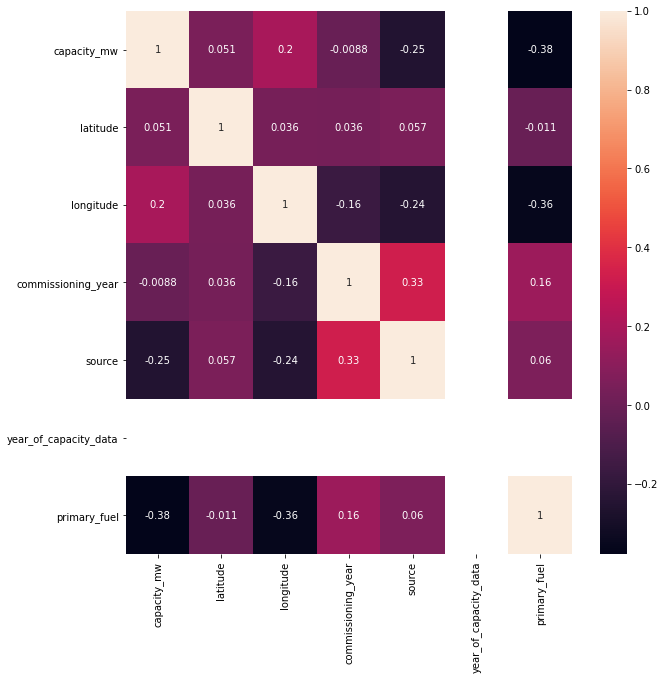

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size': 10})

In [129]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
commissioning_year       0
source                   0
year_of_capacity_data    0
primary_fuel             0
dtype: int64

In [130]:
df.shape

(861, 7)

In [136]:
df.skew()

capacity_mw              3.037191
latitude                -0.145866
longitude                1.112646
commissioning_year      -1.683585
source                   1.778807
year_of_capacity_data    0.000000
primary_fuel             0.507576
dtype: float64

In [137]:
from sklearn.preprocessing import power_transform

In [138]:
x=power_transform(x,method='yeo-johnson')
x

array([[-1.69929917,  1.12729873, -0.91964073,  0.35745427,  1.55045334,
         0.        ],
       [ 0.15113225,  0.56492883, -0.5208736 ,  0.74374325,  2.00515125,
         0.        ],
       [-0.33202128,  0.09947761, -2.32001101,  0.74374325, -0.48083833,
         0.        ],
       ...,
       [-0.55929908, -0.95515125, -0.26272209,  0.74374325, -0.48083833,
         0.        ],
       [ 0.0445372 ,  0.49690708, -0.76677919,  0.74374325,  0.87553451,
         0.        ],
       [-0.78807982, -1.7750548 ,  0.18786467,  0.74374325, -0.48083833,
         0.        ]])

# Predicting Primary Fuel

In [134]:
x=df.iloc[:,0:-1]
x.head(4)

,capacity_mw,latitude,longitude,commissioning_year,source,year_of_capacity_data
0,2.5,28.1839,73.2407,2011.0,109,2019.0
1,98.0,24.7663,74.6090,2015.0,174,2019.0
2,39.2,21.9038,69.3732,2015.0,21,2019.0
3,135.0,23.8712,91.3602,2004.0,22,2019.0


In [135]:
y=df.iloc[:,-1]
y.head(4)

0    6
1    1
2    7
3    2
Name: primary_fuel, dtype: int64

In [151]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=4)

In [154]:
x_train.shape

(602, 6)

In [155]:
x_test.shape

(259, 6)

In [156]:
y_train.shape

(602,)

In [161]:
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model=[svc,dtc,knc,adc,gdc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',predm)
    print('actual value',y_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Predicted result value: [6 1 0 1 1 7 1 3 3 3 3 1 3 7 3 1 3 6 6 1 7 3 3 1 7 3 6 3 0 3 6 7 7 3 0 3 1
 1 1 3 6 3 7 3 3 3 1 3 1 3 6 3 3 1 0 7 1 1 0 3 1 0 7 1 3 7 3 6 7 3 3 1 3 6
 1 1 3 0 6 7 6 1 6 7 1 3 1 3 1 1 3 6 0 1 3 6 1 0 3 6 7 1 1 6 1 1 0 7 0 6 1
 1 1 1 1 7 0 7 6 7 7 7 3 3 1 3 3 0 1 3 3 1 3 1 6 6 6 0 1 1 1 1 1 0 6 3 7 3
 3 1 3 1 1 0 3 1 1 3 1 1 1 3 1 0 7 7 6 6 6 1 1 3 6 1 1 1 7 1 7 3 1 1 1 6 1
 7 1 7 3 1 0 1 1 7 1 3 1 7 1 3 1 1 7 1 1 0 1 0 1 3 3 1 1 7 7 1 3 1 3 1 3 0
 3 7 7 3 3 1 1 1 1 6 3 1 7 3 3 3 3 1 3 3 1 7 7 3 7 1 1 3 0 3 7 6 3 3 1 3 1]
actual value 660    6
821    1
73     1
110    1
447    1
      ..
372    2
566    3
223    2
854    3
598    3
Name: primary_fuel, Length: 259, dtype: int64
0.7567567567567568
[[10  2  0  0  0  0  2  1]
 [ 3 70  0  7  0  0  1  2]
 [ 1 10  0  7  0  0  0  0]
 [ 0  5  0 57  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 5  0  0  2  0  0  0  0]
 [ 3  5  0  0  0  0 26  3]
 [ 0  1  0  0  0  0  0 33]]
              precision    recall  f1-score   support

 

Here best model comes out to be GradientBoostingClassifier with accuracy of around 85%

# Cross Validation

In [163]:
from sklearn.model_selection import cross_val_score

In [164]:
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model_cv=[svc,dtc,knc,adc,gdc]

for i in model_cv:
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print (score.mean())
    print (score.std())

[0.74566474 0.79651163 0.79651163 0.77906977 0.70930233]
0.7654120177443204
0.03364270550605118
[0.73988439 0.76162791 0.77906977 0.77906977 0.75581395]
0.7630931576824842
0.014861255985094746
[0.79190751 0.76744186 0.80813953 0.76162791 0.76162791]
0.7781489447506386
0.01870435654534391
[0.42196532 0.40697674 0.4127907  0.41860465 0.40697674]
0.4134628310256755
0.006055097124227901
[0.82080925 0.84302326 0.8372093  0.83139535 0.81395349]
0.8292781287807502
0.01061019498085516


So, our CV score is also coming same. Now, we can proceed further.

# Hypermeter Tuning

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
param_gdc={'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}
modelgdc=GradientBoostingClassifier()

In [167]:
gridgdc=GridSearchCV(estimator=modelgdc,param_grid=param_gdc)
gridgdc.fit(x,y)
print(gridgdc)
print(gridgdc.best_score_)
print(gridgdc.best_estimator_)
print(gridgdc.best_params_)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1]})
0.836248151633284
GradientBoostingClassifier(learning_rate=0.25)
{'learning_rate': 0.25}


In [169]:
gdc_final=GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gdc_final.fit(x_train,y_train)
gdc_final.score(x_train,y_train)

0.8803986710963455

In [170]:
pred_final=gdc_final.predict(x_test)
print('Predicted result value:',pred_final)
print('actual value',y_test)

Predicted result value: [6 1 0 1 1 7 1 3 3 3 3 6 2 7 3 1 3 6 6 1 6 3 3 1 7 3 6 3 0 3 6 7 7 3 0 3 1
 1 1 3 6 3 7 3 3 3 1 3 2 3 6 3 3 1 0 7 3 7 0 3 1 0 7 1 1 1 3 6 7 3 3 1 3 6
 1 6 3 6 6 7 6 1 6 7 1 3 1 3 1 1 3 6 0 1 3 6 1 0 1 6 7 7 1 7 2 1 1 7 0 6 1
 1 1 1 3 7 0 7 6 7 7 7 3 3 1 3 3 0 1 3 1 1 3 1 6 6 6 0 1 2 1 1 1 6 6 2 0 3
 2 1 3 1 1 6 3 1 3 2 1 1 1 3 1 0 7 7 6 6 6 1 1 3 6 1 1 1 7 1 6 3 1 1 1 1 1
 7 3 7 3 2 0 1 1 7 1 3 1 7 1 3 1 1 7 1 1 6 1 0 1 1 3 2 1 6 7 1 1 1 3 1 3 0
 3 7 7 3 3 2 2 1 1 6 3 1 7 3 3 3 3 1 3 3 2 7 7 3 7 1 1 3 2 3 7 6 3 3 1 3 1]
actual value 660    6
821    1
73     1
110    1
447    1
      ..
372    2
566    3
223    2
854    3
598    3
Name: primary_fuel, Length: 259, dtype: int64


In [171]:
print('accuracy_score:',accuracy_score(y_test,pred_final))
print(confusion_matrix(y_test,pred_final))
print(classification_report(y_test,pred_final))

accuracy_score: 0.7992277992277992
[[11  2  0  0  0  0  2  0]
 [ 2 68  2  6  0  0  4  1]
 [ 1  4 10  3  0  0  0  0]
 [ 0  5  0 57  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 3  0  1  2  0  0  1  0]
 [ 0  6  0  0  0  0 28  3]
 [ 0  0  0  0  0  0  1 33]]
              precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.79      0.82      0.80        83
           2       0.77      0.56      0.65        18
           3       0.81      0.92      0.86        62
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         7
           6       0.78      0.76      0.77        37
           7       0.89      0.97      0.93        34

    accuracy                           0.80       259
   macro avg       0.59      0.59      0.59       259
weighted avg       0.77      0.80      0.78       259



In [194]:
import pickle
filename='Global_Power_Plant_Database.pkl'
pickle.dump(gdc_final, open(filename,'wb'))

# Predicting Capacity_MW

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [178]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [179]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=.30,random_state=4)

In [180]:
x1_train.shape

(602, 6)

In [182]:
x1_test.shape

(259, 6)

In [183]:
y1_train.shape

(602,)

In [185]:
lg1=LinearRegression()
ls=Lasso(alpha=0.0001)
rd=Ridge(alpha=0.0001)
enr=ElasticNet(alpha=0.0001)
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()

model1=[lg1,ls,rd,enr,svr,dtr,knr,adr,gbr]

for n in model1:
    n.fit(x1_train,y1_train)
    n.score(x1_train,y1_train)
    predn=n.predict(x1_test)
    print('Predicted result value:',predn)
    print('actual value',y1_test)
    print('Mean absolute error:',mean_absolute_error(y1_test,predn))
    print('Mean squared error:',mean_squared_error(y1_test,predn))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,predn)))
    print('r2_score:',r2_score(y1_test,predn))
    print('\n')

Predicted result value: [5.98276689 1.58939304 3.97433932 1.93460113 1.39709209 5.04942887
 0.66328112 2.91476714 2.59086667 4.416697   1.1282329  2.84777169
 1.41797207 4.60474955 3.57832075 1.30545671 3.91012402 5.05936335
 4.86542588 1.29109966 5.93824041 2.09655151 3.1139096  1.27493211
 4.85953706 3.76930976 4.93719366 4.59809417 3.91972302 2.81117993
 3.95233705 4.08280672 5.96329973 4.52334399 3.23886721 3.06872777
 3.35736588 2.95052739 1.41799704 3.18655635 4.16492991 2.96749389
 6.11244948 4.35310482 2.99201328 4.22550425 1.62175055 2.15688779
 4.04105471 3.02255338 3.06208595 3.28032345 4.84606334 3.78291417
 3.76950233 4.20778739 3.01548845 2.76222528 3.47676578 1.35577616
 2.36819233 2.99821547 4.70706282 3.56144513 1.69780588 3.85973676
 2.33217234 3.83940383 4.59998086 2.1308595  4.51011963 0.95740763
 2.94397145 5.17833552 1.48733378 2.75534168 3.65002506 3.19548813
 4.19329598 4.97994209 3.49677453 3.48944941 3.16842471 3.74767146
 1.79022568 2.69803779 2.91146726 2.68

Predicted result value: [4.8125     2.4017094  2.99452055 2.20769231 2.27664399 6.18181818
 2.20769231 2.4245283  2.4017094  3.05263158 2.4017094  3.05668016
 2.62117647 7.         3.         2.4017094  2.78       5.4
 5.86842105 2.27664399 6.18181818 2.75541796 2.75541796 2.27664399
 7.         2.27664399 5.54       2.27664399 2.75541796 2.75541796
 5.24390244 7.         6.18181818 3.         2.0495283  2.4017094
 2.41504854 2.75541796 2.27664399 2.78       4.47826087 2.75541796
 6.18181818 2.27664399 2.62117647 3.04487179 2.27664399 2.75
 2.75541796 2.41504854 4.47826087 2.78       3.         3.06422018
 2.27664399 7.         2.27664399 7.         1.98831776 2.4245283
 2.75541796 2.27664399 7.         2.27664399 2.27664399 2.4017094
 2.27664399 5.4        7.         2.75       2.27664399 2.27383863
 2.41504854 5.4        2.20769231 3.05263158 3.         2.33333333
 4.26724138 6.18181818 2.62117647 2.75       3.06422018 7.
 2.27664399 2.4017094  2.75541796 2.4245283  2.27664399 2.4150

so, best r2 score is of Gradient Boosting Regressor. We will see the CV score now.

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
score=cross_val_score(gbr,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[0.65956918 0.74453841 0.80132976 0.69146815 0.78740699 0.69736082
 0.7750163  0.79568697]
0.7440470732898063
0.05107355752735224


# Hypermeter Tuning

In [189]:
param_gdr={'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}
modelgdr=GradientBoostingRegressor()

In [190]:
gridgdr=GridSearchCV(estimator=modelgdr,param_grid=param_gdr)
gridgdr.fit(x,y)
print(gridgdr)
print(gridgdr.best_score_)
print(gridgdr.best_estimator_)
print(gridgdr.best_params_)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1]})
0.7479605433435923
GradientBoostingRegressor(learning_rate=0.25)
{'learning_rate': 0.25}


In [191]:
gdr_final=GradientBoostingRegressor(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gdr_final.fit(x1_train,y1_train)
gdr_final.score(x1_train,y1_train)

0.7357334483090501

In [192]:
pred_final=gdr_final.predict(x_test)
print('Predicted result value:',pred_final)
print('actual value',y1_test)

Predicted result value: [4.51404494 2.13465298 2.68047634 1.69231353 1.41795819 6.75437739
 1.48481071 2.67736918 2.19527154 3.19042319 2.29872131 2.55969353
 2.30247636 5.6637549  2.98346167 1.78820103 2.96530435 5.07177853
 5.19040659 1.26457746 7.70429669 2.19084481 2.92613438 1.26457746
 5.86608748 2.75654836 5.27882251 3.13001199 2.49168909 2.18452641
 4.27986398 6.3911019  7.70429669 3.18579424 2.05254554 2.73962496
 1.75928121 1.85228723 1.83558425 2.98346167 4.16050598 2.46168553
 7.64424852 2.92767942 2.61244717 2.76934489 1.65333606 2.33484643
 3.90380638 2.92359211 4.46465588 2.98346167 4.05261678 2.77984725
 2.49168909 6.04052643 2.51066485 6.04052643 2.25487811 2.05543365
 2.18088357 2.30363463 5.6637549  2.29026062 2.4018856  2.27388959
 2.08146776 4.86855681 5.6637549  2.15847474 2.92767942 1.11558221
 2.92359211 5.27882251 0.94586694 2.55969353 3.48958929 2.36335106
 4.05112893 6.81442557 2.55772528 2.29026062 2.69797201 6.22449358
 1.45523862 2.73962496 1.75928121 2.33

In [195]:
import pickle
filename='Global_Power_Plant_Database.pkl'
pickle.dump(gdr_final, open(filename,'wb'))